In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import talib




# WRANGLE IT!

In [3]:
#Change index date to datetime
amzn=pd.read_csv('AMZN_data.csv',index_col=0)


In [4]:
amzn.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-04,2.730729,2.966667,2.665625,2.957813,2.957813,785844000
1999-01-05,2.739063,3.243750,2.662500,3.112500,3.112500,1257464000
1999-01-06,3.409375,3.509375,3.350000,3.450000,3.450000,723532000
1999-01-07,3.428125,4.006250,3.325000,3.971875,3.971875,945492000
1999-01-08,4.606250,4.978125,3.800000,4.006250,4.006250,1333244000


In [5]:
amzn.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-23,83.250000,85.779999,82.930000,85.250000,85.250000,57433700
2022-12-27,84.970001,85.349998,83.000000,83.040001,83.040001,57284000
2022-12-28,82.800003,83.480003,81.690002,81.820000,81.820000,58228600
2022-12-29,82.870003,84.550003,82.550003,84.180000,84.180000,54995900
2022-12-30,83.120003,84.050003,82.470001,84.000000,84.000000,62401200


In [6]:
amzn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6039 entries, 1999-01-04 to 2022-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       6039 non-null   float64
 1   High       6039 non-null   float64
 2   Low        6039 non-null   float64
 3   Close      6039 non-null   float64
 4   Adj Close  6039 non-null   float64
 5   Volume     6039 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 330.3+ KB


-- ADD 2023 DATA SET
1. Change index date to datetime
2. change columns names to lower case
--- there is no nulls
3. change all decimals for up two-three decimal spaces.
4. create data Dictionary
5. Divide data as Time Series Analysis
5. Data Visualization and exploration
6. machine learning application/modeling/ prediction
7. assess accuracy. 

In [18]:
#Change index date to datetime
amzn2 = pd.read_csv('AMZN_2023.csv',index_col=0)

In [ ]:
amzn2.

In [26]:
combined_amzn=pd.concat([amzn,amzn2], ignore_index=False)

In [30]:
combined_amzn.to_csv('combined_amzn.csv')

In [33]:
df=pd.read_csv('combined_amzn.csv',index_col=0)

In [34]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-04,2.730729,2.966667,2.665625,2.957813,2.957813,785844000
1999-01-05,2.739063,3.243750,2.662500,3.112500,3.112500,1257464000
1999-01-06,3.409375,3.509375,3.350000,3.450000,3.450000,723532000
1999-01-07,3.428125,4.006250,3.325000,3.971875,3.971875,945492000
1999-01-08,4.606250,4.978125,3.800000,4.006250,4.006250,1333244000


In [35]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-14,149.929993,150.539993,145.520004,147.419998,147.419998,58400800
2023-12-15,148.380005,150.570007,147.880005,149.970001,149.970001,110039100
2023-12-18,150.559998,154.850006,150.050003,154.070007,154.070007,62512800
2023-12-19,154.399994,155.119995,152.690002,153.789993,153.789993,43171300
2023-12-20,152.899994,155.630005,151.559998,152.119995,152.119995,50258500


In [51]:
 #change columns names to lower case --- there is no nulls
df = df.rename_axis('date')
df= df.rename(columns={'Open':'open','High':'high','Low':'low'
                    ,'Close':'close','Adj Close': 'adjusted_close','Volume':'volume'})

In [52]:
#change all decimals for up two decimal spaces.
df=df.round(2)
df.sample(3)

,open,high,low,close,adjusted_close,volume
date,,,,,,
2003-10-28,2.76,2.85,2.73,2.84,2.84,184618000
2010-01-06,6.73,6.74,6.58,6.61,6.61,143576000
2023-02-14,98.41,100.92,97.52,99.70,99.70,56202900


In [56]:
#change index to datetime
df.index = pd.to_datetime(df.index)

In [57]:
df.sample(4)

,open,high,low,close,adjusted_close,volume
date,,,,,,
2023-05-30,122.37,122.92,119.86,121.66,121.66,64314800
2004-09-15,2.10,2.16,2.09,2.11,2.11,222716000
2020-07-22,156.25,157.50,153.26,155.00,155.00,82084000
2014-01-21,20.15,20.39,20.08,20.35,20.35,62442000


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6283 entries, 1999-01-04 to 2023-12-20
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   open            6283 non-null   float64
 1   high            6283 non-null   float64
 2   low             6283 non-null   float64
 3   close           6283 non-null   float64
 4   adjusted_close  6283 non-null   float64
 5   volume          6283 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 343.6 KB


### data dictionary created on pages

## Data train/test split TSA

In [71]:
#divide df into train/test time series analysi
train_size = 0.70 
n = df.shape[0] 
test_start_index = round(train_size * n) 
train = df.iloc[:test_start_index] #end at the test_start_index
test = df.iloc[test_start_index:] # start at the test_start_index

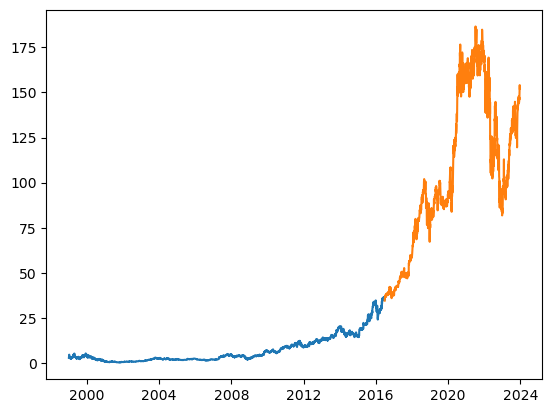

In [70]:
plt.plot(train.adjusted_close)
plt.plot(test.adjusted_close

## Will be working with quarterly numbers for exploration and modeling purposes

In [80]:
train_q = train.resample('Q').mean()
test_q= test.resample('Q').mean()

In [81]:
train_q.sample(6)

,open,high,low,close,adjusted_close,volume
date,,,,,,
2003-06-30,1.556508,1.585556,1.531111,1.561111,1.561111,1.847457e+08
2012-03-31,9.255323,9.396935,9.152581,9.302419,9.302419,1.193846e+08
2013-12-31,17.967969,18.142969,17.770312,17.981094,17.981094,5.849681e+07
2010-09-30,6.473594,6.580625,6.403750,6.522344,6.522344,1.322084e+08
2005-12-31,2.282222,2.310794,2.256032,2.285556,2.285556,1.538423e+08
2011-03-31,8.836452,8.942581,8.737581,8.847097,8.847097,1.059248e+08


## Let's get plotting!


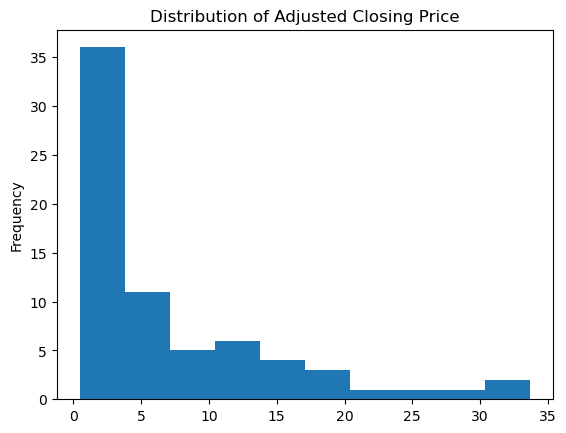

In [83]:
train_q.adjusted_close.plot.hist()
plt.title('Distribution of Adjusted Closing Price')
plt.show()

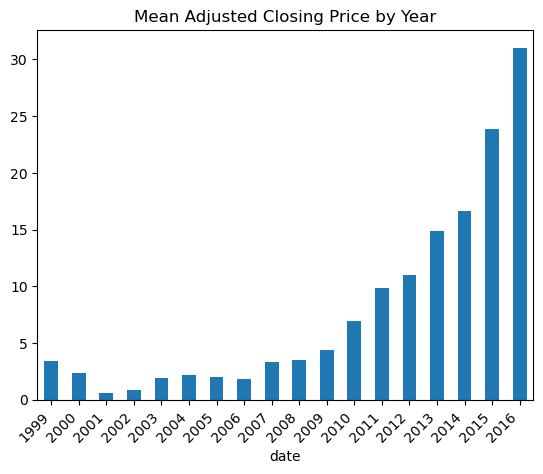

In [88]:
ax = train.groupby(train.index.year).adjusted_close.mean().plot.bar()
plt.title('Mean Adjusted Closing Price by Year')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

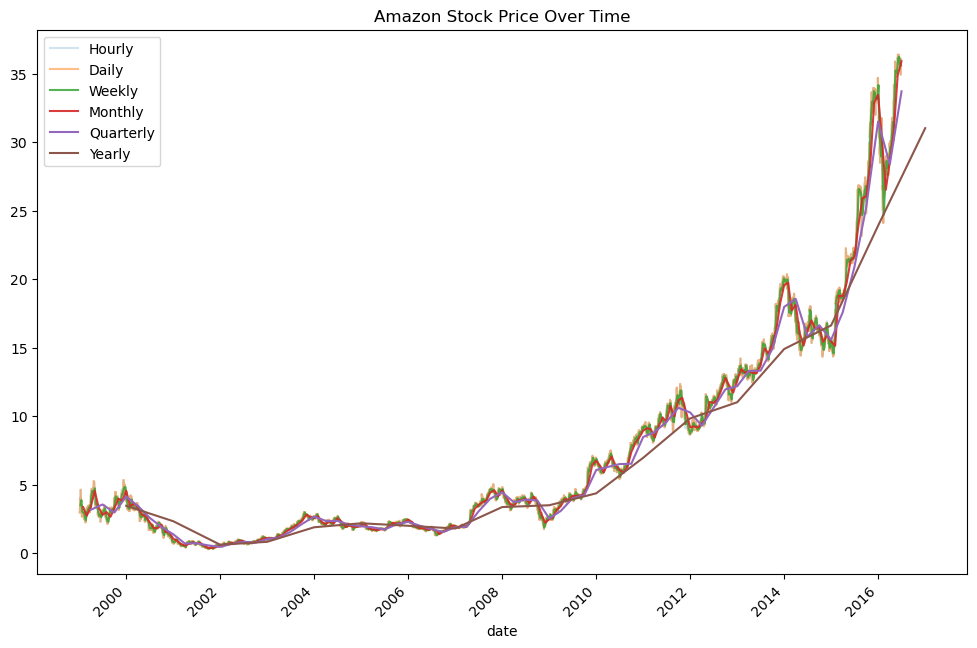

In [94]:
plt.figure(figsize=(12, 8))


y = train.index

train['adjusted_close'].plot(alpha=0.2, label='Hourly')
train['adjusted_close'].resample('D').mean().plot(alpha=0.5, label='Daily')
train['adjusted_close'].resample('W').mean().plot(alpha=0.8, label='Weekly')
train['adjusted_close'].resample('M').mean().plot(alpha=0.9, label='Monthly')
train['adjusted_close'].resample('Q').mean().plot(label='Quarterly')
train['adjusted_close'].resample('Y').mean().plot(label='Yearly')

# Adjust x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.title('Amazon Stock Price Over Time')
plt.legend()
plt.show()

/var/folders/r9/xwd31bj10k5419t8xfmyr4540000gn/T/ipykernel_52103/3782723841.py:13: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for ax, (month, subset) in zip(axs, table.iteritems()):


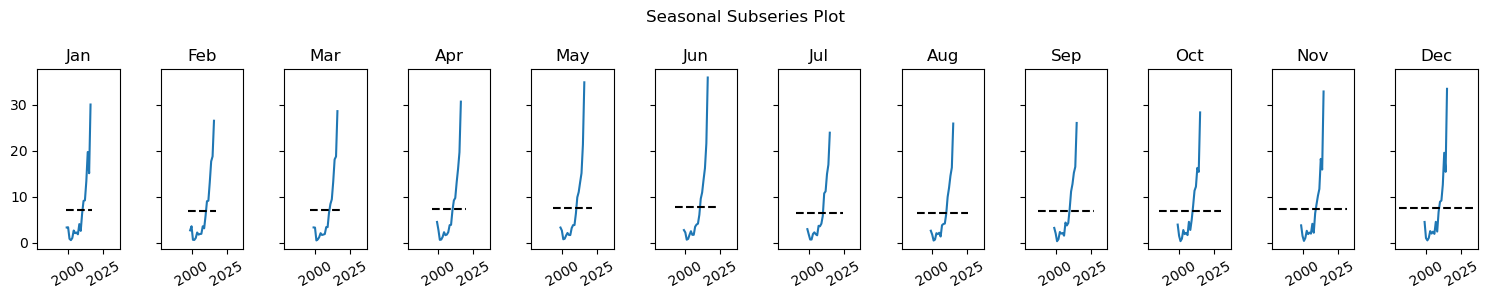

In [101]:
#SEASONAL SUBSERIES PLOT
# make my pivot table of years to month with unstack()
table = pd.pivot_table(train, values='adjusted_close', index=train.index.year, columns=train.index.month, aggfunc='mean')

table.head()

# Unpacking figure and axes elements
fig, axs = plt.subplots(1, 12, sharey=True, sharex=True, figsize=(15, 3))

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# for ax, (month, subset)
for ax, (month, subset) in zip(axs, table.iteritems()):
    month_name = month_names[month - 1]  # Adjust for 1-based indexing of months
    subset.plot(ax=ax, title=month_name)
    ax.hlines(subset.mean(), *ax.get_xlim(), color='black', ls='--')
    ax.set(xlabel='')
    ax.tick_params('x', rotation=30)

fig.suptitle('Seasonal Subseries Plot')  # Super-title for the overall figure
fig.tight_layout()
fig.subplots_adjust(wspace=0.5)  # Adjust the width space between subplots
plt.show()

## Exploration Questions:

1. How has the overall trend in Amazon stock prices evolved over the entire time period available in the dataset?
2. Are there any noticeable long-term patterns, upward or downward trends, and what factors might have contributed to these trends?
3. Are there any discernible seasonal patterns or cyclical trends in Amazon stock prices over different periods, such as months, quarters, or years?
4. How do key events or seasons (e.g., holiday seasons, earnings reports) correlate with fluctuations in stock prices?
5. How variable are Amazon stock prices over time, and has there been any significant change in volatility during specific periods?
6. Can you identify and analyze any major events (e.g., earnings announcements, market shifts, global events) that coincide with notable spikes or declines in volatility?

### Major events that may have affected the stock market:

1. Dot-com Bubble Burst (2000-2002):

- The bursting of the dot-com bubble led to a significant decline in technology stocks, affecting the overall market.
2. September 11, 2001 (9/11) Attacks:

- The terrorist attacks on September 11, 2001, had a profound impact on global financial markets, leading to a temporary closure of U.S. stock exchanges.

3. Global Financial Crisis (2008):

- The collapse of Lehman Brothers and the subsequent global financial crisis led to a severe recession, impacting markets worldwide.
4. Bank Bailouts (2008-2009):

- Governments intervened with significant financial assistance to stabilize banks during the financial crisis.
5. European Debt Crisis (2010-2012):

- Concerns over sovereign debt in European countries, particularly Greece, led to market volatility.
6. U.S. Debt Ceiling Crisis (2011):

- Political deadlock over the U.S. debt ceiling raised concerns about a potential default, impacting financial markets.

7. COVID-19 Pandemic (2020):

- The global pandemic led to widespread economic disruptions, market crashes, and subsequent recoveries.
8. Tech Stock Boom (2020-2021):

- A surge in technology stocks, including Amazon, during the COVID-19 pandemic as remote work and e-commerce gained prominence.